### ITSM Ticket automation using RNN


1. NLP using LSTM to the Description of the problem
2. Run RNN for the attributes

In [12]:
import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [83]:
data = pd.read_csv('/Users/jairomelo/Desktop/ML/YORK/ML1030/Capstone Project/incident.csv')

In [84]:
data.head()

,Number,Description,Short_Description,Caller,Priority,Category,Sub_Category,Urgency,Impact,Configuration_item,...,CI_regions,Manufacturer,Managed_by_group,Application_ID.1,Escalation,Created,Resolved,Problem,Reliability,Reopened
0,INC000018985872,unable to access Huddle\ntried to access Huddl...,DS huddle Login issue,KRISTIN KELLEY (1053413),Priority 4,Software,Desktop Software,Low,Limited,DS MOBILE,...,NaN,NaN,NaN,NaN,Normal,2018-09-04 10:30,2018-09-04 10:35,NaN,False,False
1,INC000017134725,'@GSD TEAM PLEASE ASSIGN THIS INCIDENT O DRUPA...,Software - J&J business applications: Alert / ...,MARCIA MARIA DE OLIVEIRA LIMA ALGOSINO (75185749),Priority 4,Software,Enterprise software,Low,Localized,PORTAL WEB DE OCORRÊNCIAS BR,...,LATAM,NaN,NaN,NaN,Normal,2017-07-26 10:33,2017-07-31 21:13,NaN,False,False
2,INC000019381882,When did this issue begin?:2018-11-25\n\nWho i...,CONTACT 2 - 11.26.2018: LES is reporting an er...,AUDREY BURKE (702264889),Priority 3,Application,Application availability,High,Limited,LES INDISPENSABLES DE LA LLC-MOBILE APPLICATION,...,EMEA,NaN,NaN,NaN,Normal,2018-11-25 6:10,2018-11-28 6:08,NaN,False,False
3,INC000019729650,Unable to open files from Portal Huddle of Ne...,Unable to open files from Portal Huddle of Neo,PAULA KRUSE (1050340),Priority 4,Software,Website,Low,Limited,NEOSTRATA WEBSITES,...,NaN,NaN,NaN,NaN,Normal,2019-02-07 8:30,2019-02-13 11:47,NaN,False,False
4,INC000019550749,ASPAC-CONSUMER-SOURCE-MDWF portal entering iss...,ASPAC-CONSUMER-SOURCE-MDWF portal entering issue,YONGXIU WANG (152833931),Priority 4,Application,Error Message,Low,Limited,CONSUMER ASPAC WEBSITES,...,ASPAC,NaN,NaN,NaN,Normal,2019-01-02 1:27,2019-01-02 1:28,NaN,False,False


In [85]:
data.Category.value_counts()

Software            4532
Application         1736
Help/ Assistance    1678
Network              334
Monitoring           267
Service Request      101
Hardware              41
Server                38
Cloud Computing       26
Database              21
Security              20
Storage                4
Inquiry/Help           1
Help/Assistance        1
CISCO eBonding         1
Name: Category, dtype: int64

### Actions:
1. Balance the data sample.
2. Description has null values; we will use short description in case of missing description, and filter any record where no description nor short description is provided
3. Removing any occurence where 

In [86]:
data.Sub_Category.value_counts()

Website                              1989
Enterprise software                  1426
Data Issue                            777
Redirect user                         614
Mobile                                587
Information                           504
Walk Through Solution                 502
Desktop Software                      458
Application availability              357
Error Message                         340
Availability                          257
Remote Connectivity                   214
Login issue                           140
Job Failure                           100
End-User                               60
Password Reset                         54
Wireless (WLAN)                        45
Local Connectivity (on-site)           43
IT                                     41
Email                                  36
Operating System                       31
Windows                                28
Laptop                                 24
Access Point                      

In [87]:
data.Resolution_category.value_counts()

User Access / Permission                   2013
User knowledge or training error           1915
Data Issue                                 1306
Configuration Error                         911
Connectivity                                847
Incident Opened in Error / Not serviced     481
Application Defect (SDLC activities)        283
Change Implementation                       260
Job Failure                                 142
Software Bug (vendor)                       114
Capacity/ Disk Space                         72
Security / Network password                  71
Software Incompatibility                     60
Interface or Middleware                      52
Cancelled by user                            50
High Memory Utilization                      35
Broken/Damaged  (physical)                   30
Physical environmental failure               27
Missing Patch                                20
High CPU Usage                               12
SSO/Network                             

In [88]:
data['target'] = data.Category.astype('category').cat.codes

In [89]:
data.head()

,Number,Description,Short_Description,Caller,Priority,Category,Sub_Category,Urgency,Impact,Configuration_item,...,Manufacturer,Managed_by_group,Application_ID.1,Escalation,Created,Resolved,Problem,Reliability,Reopened,target
0,INC000018985872,unable to access Huddle\ntried to access Huddl...,DS huddle Login issue,KRISTIN KELLEY (1053413),Priority 4,Software,Desktop Software,Low,Limited,DS MOBILE,...,NaN,NaN,NaN,Normal,2018-09-04 10:30,2018-09-04 10:35,NaN,False,False,13
1,INC000017134725,'@GSD TEAM PLEASE ASSIGN THIS INCIDENT O DRUPA...,Software - J&J business applications: Alert / ...,MARCIA MARIA DE OLIVEIRA LIMA ALGOSINO (75185749),Priority 4,Software,Enterprise software,Low,Localized,PORTAL WEB DE OCORRÊNCIAS BR,...,NaN,NaN,NaN,Normal,2017-07-26 10:33,2017-07-31 21:13,NaN,False,False,13
2,INC000019381882,When did this issue begin?:2018-11-25\n\nWho i...,CONTACT 2 - 11.26.2018: LES is reporting an er...,AUDREY BURKE (702264889),Priority 3,Application,Application availability,High,Limited,LES INDISPENSABLES DE LA LLC-MOBILE APPLICATION,...,NaN,NaN,NaN,Normal,2018-11-25 6:10,2018-11-28 6:08,NaN,False,False,0
3,INC000019729650,Unable to open files from Portal Huddle of Ne...,Unable to open files from Portal Huddle of Neo,PAULA KRUSE (1050340),Priority 4,Software,Website,Low,Limited,NEOSTRATA WEBSITES,...,NaN,NaN,NaN,Normal,2019-02-07 8:30,2019-02-13 11:47,NaN,False,False,13
4,INC000019550749,ASPAC-CONSUMER-SOURCE-MDWF portal entering iss...,ASPAC-CONSUMER-SOURCE-MDWF portal entering issue,YONGXIU WANG (152833931),Priority 4,Application,Error Message,Low,Limited,CONSUMER ASPAC WEBSITES,...,NaN,NaN,NaN,Normal,2019-01-02 1:27,2019-01-02 1:28,NaN,False,False,0


In [90]:
data['num_words'] = data['Description'].apply(lambda x : len(x.split()))

In [91]:
bins=[0,50,75, np.inf]
data['bins']=pd.cut(data.num_words, bins=[0,10,30,50,80, np.inf], labels=['0-10', '10-30', '30-50','50-80' ,'>80'])


In [92]:
word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [93]:
word_distribution.head()

,bins,counts
0,0-10,6446
1,10-30,2294
2,30-50,54
3,50-80,4
4,>80,3


Text(0.5, 1.0, 'Word distribution per bin')

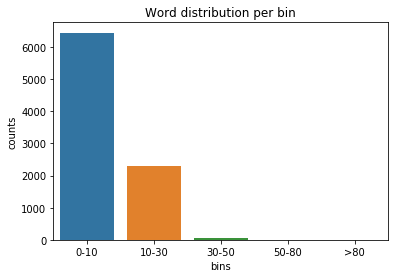

In [94]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [95]:
data.head()

,Number,Description,Short_Description,Caller,Priority,Category,Sub_Category,Urgency,Impact,Configuration_item,...,Application_ID.1,Escalation,Created,Resolved,Problem,Reliability,Reopened,target,num_words,bins
0,INC000018985872,unable to access Huddle\ntried to access Huddl...,DS huddle Login issue,KRISTIN KELLEY (1053413),Priority 4,Software,Desktop Software,Low,Limited,DS MOBILE,...,NaN,Normal,2018-09-04 10:30,2018-09-04 10:35,NaN,False,False,13,13,10-30
1,INC000017134725,'@GSD TEAM PLEASE ASSIGN THIS INCIDENT O DRUPA...,Software - J&J business applications: Alert / ...,MARCIA MARIA DE OLIVEIRA LIMA ALGOSINO (75185749),Priority 4,Software,Enterprise software,Low,Localized,PORTAL WEB DE OCORRÊNCIAS BR,...,NaN,Normal,2017-07-26 10:33,2017-07-31 21:13,NaN,False,False,13,14,10-30
2,INC000019381882,When did this issue begin?:2018-11-25\n\nWho i...,CONTACT 2 - 11.26.2018: LES is reporting an er...,AUDREY BURKE (702264889),Priority 3,Application,Application availability,High,Limited,LES INDISPENSABLES DE LA LLC-MOBILE APPLICATION,...,NaN,Normal,2018-11-25 6:10,2018-11-28 6:08,NaN,False,False,0,58,50-80
3,INC000019729650,Unable to open files from Portal Huddle of Ne...,Unable to open files from Portal Huddle of Neo,PAULA KRUSE (1050340),Priority 4,Software,Website,Low,Limited,NEOSTRATA WEBSITES,...,NaN,Normal,2019-02-07 8:30,2019-02-13 11:47,NaN,False,False,13,9,0-10
4,INC000019550749,ASPAC-CONSUMER-SOURCE-MDWF portal entering iss...,ASPAC-CONSUMER-SOURCE-MDWF portal entering issue,YONGXIU WANG (152833931),Priority 4,Application,Error Message,Low,Limited,CONSUMER ASPAC WEBSITES,...,NaN,Normal,2019-01-02 1:27,2019-01-02 1:28,NaN,False,False,0,5,0-10


In [96]:
num_class = len(np.unique(data.Category.values))
y = data['target'].values

## Topic Modelling

In [129]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
import pandas as pd
import re
import warnings
from sklearn.metrics import confusion_matrix
#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
#from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

In [98]:
data['Description'] = data['Description'].astype(str)

In [99]:
type(data['Description'])

pandas.core.series.Series

In [100]:
data_description = data.Description.values

In [101]:
type(data_description)

numpy.ndarray

In [102]:
#cv = # Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1, min_df=1, max_features=None)

# convert text data into term-frequency matrix
data_description = count_vec.fit_transform(data_description)




tfidf_transformer = TfidfTransformer()

# convert term-frequency matrix into tf-idf
tfidf_matrix = tfidf_transformer.fit_transform(data_description)

# create dictionary to find a tfidf word each word
word2tfidf = dict(zip(count_vec.get_feature_names(), tfidf_transformer.idf_))

for word, score in word2tfidf.items():
    print(word, score)

000 9.38958706681109
0000014860 9.38958706681109
0000017167 9.38958706681109
0000018036 9.38958706681109
0000020773 9.38958706681109
0000020921 9.38958706681109
0000023001 9.38958706681109
00024972 9.38958706681109
000263 9.38958706681109
001 9.38958706681109
001488653 9.38958706681109
0016f00001wofdywith 9.38958706681109
0030 9.38958706681109
00300450488404 9.38958706681109
003059173 9.38958706681109
00312547780216 9.38958706681109
00381370024897 9.38958706681109
00381370092346 9.38958706681109
00381371182664 9.38958706681109
00381371187690 9.38958706681109
004however 9.38958706681109
00call 9.38958706681109
00pm 9.38958706681109
012 9.38958706681109
01マスタ登録エラー 9.38958706681109
0444741 9.38958706681109
04unable 9.38958706681109
0606 9.38958706681109
0619 9.38958706681109
06703t 9.38958706681109
077 9.38958706681109
0862312533 9.38958706681109
08pm 9.38958706681109
09024485826 9.38958706681109
0929 9.38958706681109
0a5e861g45 9.38958706681109
0bc88589 9.38958706681109
100 9.38958706681

despachado 9.38958706681109
desplayed 9.38958706681109
desse 9.38958706681109
destin 9.38958706681109
destination 9.38958706681109
detai 9.38958706681109
detailes 9.38958706681109
detailing系统中打开wc的h5内容 9.38958706681109
detailing系统后台上传材料performance较差 9.38958706681109
detailing系统是企业号jtalk下属子应用 9.38958706681109
detaliing 9.38958706681109
deteniendo 9.38958706681109
determine 9.38958706681109
dethe 9.38958706681109
devicetracking 9.38958706681109
devide 9.38958706681109
devolucion 9.38958706681109
devolver 9.38958706681109
dg 9.38958706681109
dgp02db17 9.38958706681109
dgp02db19 9.38958706681109
dgp04db31 9.38958706681109
dgp05db33 9.38958706681109
dhaydel 9.38958706681109
diabestescontacto 9.38958706681109
diabetercare 9.38958706681109
diagnos 9.38958706681109
diagnostic 9.38958706681109
dialogue 9.38958706681109
dialogueillegal 9.38958706681109
diarreia 9.38958706681109
dice 9.38958706681109
didnt 9.38958706681109
dif 9.38958706681109
diffarea 9.38958706681109
difference 9.38958706681109

premium 9.38958706681109
preproduction 9.38958706681109
presbicia 9.38958706681109
prescriber 9.38958706681109
presentation 9.38958706681109
presentations 9.38958706681109
presenting 9.38958706681109
presidents 9.38958706681109
pressing 9.38958706681109
presumably 9.38958706681109
prevented 9.38958706681109
preço 9.38958706681109
prfile 9.38958706681109
price 9.38958706681109
prices 9.38958706681109
primary 9.38958706681109
prior 9.38958706681109
privacidad 9.38958706681109
privat 9.38958706681109
privateattackers 9.38958706681109
privilidges 9.38958706681109
prizes 9.38958706681109
proapp 9.38958706681109
problemi 9.38958706681109
problemメッセージ 9.38958706681109
procesos 9.38958706681109
processo 9.38958706681109
procuramos 9.38958706681109
procurement 9.38958706681109
prod_files 9.38958706681109
prodcut 9.38958706681109
produ 9.38958706681109
produce 9.38958706681109
product_backup_2019 9.38958706681109
productio 9.38958706681109
productionnet 9.38958706681109
productive 9.389587066811

In [103]:
term_frequency = count_vec.vocabulary_
type(term_frequency)

dict

In [104]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
feature_names = np.array(count_vec.get_feature_names())
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['000' 'passion' 'pastedgraphic' 'patch' 'pathd' 'paths' 'patie' 'patki'
 'patrice' 'patricia']

Features with highest idf:
['covering' 'correspondences' 'correspond' 'correspo' 'correctness'
 'corrective' 'corrected' 'correcte' 'correspondencelog' '허가사항']


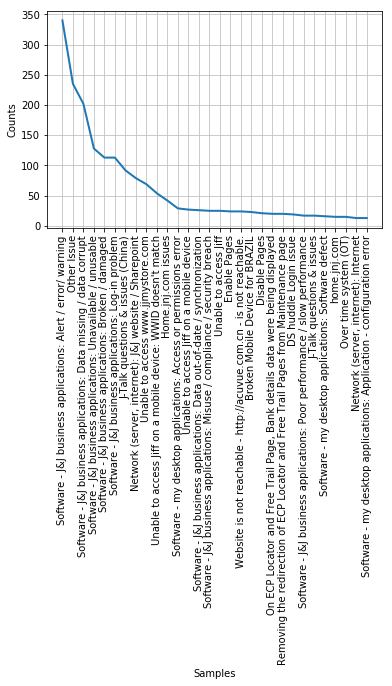

In [105]:
count = nltk.FreqDist(data.Description.values)
count.plot(30)

In [106]:
final_doc = data['Description']
all_documents = tuple(final_doc)

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(all_documents)
print (tfidf_matrix.shape)
print(tfidf_matrix)

(8801, 7585)
  (0, 6810)	0.13291041192875747
  (0, 6654)	0.19997235873621091
  (0, 991)	0.2523425672262475
  (0, 3491)	0.5022503800980753
  (0, 6743)	0.30091682563217925
  (0, 1208)	0.16268798696295267
  (0, 3250)	0.2359025088901075
  (0, 6609)	0.22429898658889114
  (0, 6303)	0.4163146391308451
  (0, 2139)	0.20535969784843747
  (0, 5133)	0.4163146391308451
  (0, 2016)	0.1209419424916789
  (1, 6609)	0.18474203304266118
  (1, 3317)	0.297145066391555
  (1, 6534)	0.23942930086679753
  (1, 5163)	0.17435662401362576
  (1, 1378)	0.26931281223086645
  (1, 3606)	0.2841198124821314
  (1, 2665)	0.2506581980897211
  (1, 1931)	0.328087160743858
  (1, 4078)	0.26695595863337923
  (1, 3312)	0.27183233227097375
  (1, 3290)	0.34289416099512293
  (1, 5997)	0.328087160743858
  (1, 3117)	0.30943254660271263
  :	:
  (8799, 4868)	0.17908150241312087
  (8799, 7076)	0.1201138880418665
  (8799, 4251)	0.1309112340062618
  (8799, 3485)	0.13856078127982951
  (8799, 3911)	0.21553952036408822
  (8799, 4986)	0.138849

In [108]:
reindexed_data= data["Description"]

data_text = data[['Description']]
data_text['index'] = data_text.index
documents=data_text


print(len(documents))
print(documents[:5])

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk


def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


8801
                                         Description  index
0  unable to access Huddle\ntried to access Huddl...      0
1  '@GSD TEAM PLEASE ASSIGN THIS INCIDENT O DRUPA...      1
2  When did this issue begin?:2018-11-25\n\nWho i...      2
3  Unable to open files from  Portal Huddle of Ne...      3
4  ASPAC-CONSUMER-SOURCE-MDWF portal entering iss...      4


In [109]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmer.stem('identified')


doc_sample = documents[documents['index'] == 5].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))


processed_docs = documents['Description'].map(preprocess)
processed_docs[:5]

original document: 
['Send', 'Ticket', 'Off', '-', 'Unable', 'to', 'Access', 'DataBase', '']


 tokenized and lemmatized document: 
['send', 'ticket', 'unabl', 'access', 'databas']


0    [unabl, access, huddl, tri, access, huddl, con...
1    [team, assign, incid, drupal, cint, group, goc...
2    [issu, begin, affect, depart, issu, report, er...
3        [unabl, open, file, portal, huddl, neostrata]
4    [aspac, consum, sourc, mdwf, portal, enter, is...
Name: Description, dtype: object

In [110]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 access
1 connect
2 huddl
3 pingident
4 tri
5 unabl
6 assign
7 cint
8 drupal
9 fluxo
10 gocorrencia


In [111]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[123]

[(2, 1), (12, 1), (73, 1)]

In [112]:
#Preview Bag Of Words for our sample preprocessed document.
bow_doc_123 = bow_corpus[123]
for i in range(len(bow_doc_123)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_123[i][0], 
                                               dictionary[bow_doc_123[i][0]], 
bow_doc_123[i][1]))

Word 2 ("huddl") appears 1 time.
Word 12 ("issu") appears 1 time.
Word 73 ("login") appears 1 time.


In [113]:
#TF-IDF
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.31886691874413164),
 (1, 0.27069498006413734),
 (2, 0.8182821340927774),
 (3, 0.353429344843192),
 (4, 0.1747860495777102)]


In [114]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [115]:
# Print the results
import pickle

# Here we can assign topic names to each topic list, you can specify the number of words you want to have shown (e.g num_words = 5)
result = lda_model.print_topics(num_topics=5, num_words=5)
print(result)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[(0, '0.061*"error" + 0.047*"code" + 0.045*"return" + 0.041*"websit" + 0.040*"http"'), (1, '0.112*"access" + 0.084*"issu" + 0.066*"unabl" + 0.049*"mobil" + 0.030*"remot"'), (2, '0.146*"puls" + 0.145*"connect" + 0.040*"unabl" + 0.035*"network" + 0.035*"compass"'), (3, '0.073*"applic" + 0.067*"softwar" + 0.055*"busi" + 0.054*"data" + 0.051*"error"'), (4, '0.064*"applic" + 0.059*"softwar" + 0.058*"busi" + 0.037*"problem" + 0.029*"site"')]
Topic: 0 
Words: 0.061*"error" + 0.047*"code" + 0.045*"return" + 0.041*"websit" + 0.040*"http" + 0.036*"page" + 0.035*"statu" + 0.018*"applic" + 0.013*"jira" + 0.013*"need"
Topic: 1 
Words: 0.112*"access" + 0.084*"issu" + 0.066*"unabl" + 0.049*"mobil" + 0.030*"remot" + 0.030*"devic" + 0.028*"user" + 0.026*"home" + 0.024*"talk" + 0.019*"break"
Topic: 2 
Words: 0.146*"puls" + 0.145*"connect" + 0.040*"unabl" + 0.035*"network" + 0.035*"compass" + 0.034*"locat" + 0.028*"internet" + 0.023*"trail" + 0.021*"navita" + 0.020*"page"
Topic: 3 
Words: 0.073*"applic" 

In [116]:
# put these in a file and name the topics
with open("lda_topics_result.txt", "w") as f:
    for s in result:
        f.write(str(s) +"\n")

In [117]:
# Visualize
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(lda_model, bow_corpus,dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [118]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda_model.show_topic(i,25)) for i in range(5)}

In [119]:
import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(94, 5)
(5, 94)


In [120]:
df_lda

,aaom,access,account,acuvu,adal,alert,applic,ask,bank,brazil,...,trail,unabl,unavail,unus,user,walk,warn,websit,work,配達くん
0,0.000000,0.008792,0.000000,0.008743,0.000000,0.000000,0.017943,0.010994,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.009914,0.000000,0.000000,0.041351,0.009886,0.000000
1,0.000000,0.112353,0.000000,0.000000,0.000000,0.000000,0.014006,0.000000,0.000000,0.017758,...,0.00000,0.065659,0.000000,0.000000,0.028207,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.019928,0.000000,0.000000,0.000000,0.000000,0.014176,0.000000,...,0.02345,0.040202,0.000000,0.000000,0.015956,0.000000,0.000000,0.015449,0.019253,0.000000
3,0.009104,0.000000,0.000000,0.000000,0.000000,0.024965,0.073043,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.009566,0.009035,0.024083,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.008393,0.000000,0.009759,0.000000,0.063876,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.028841,0.023975,0.009268,0.000000,0.000000,0.009433,0.011968,0.009209


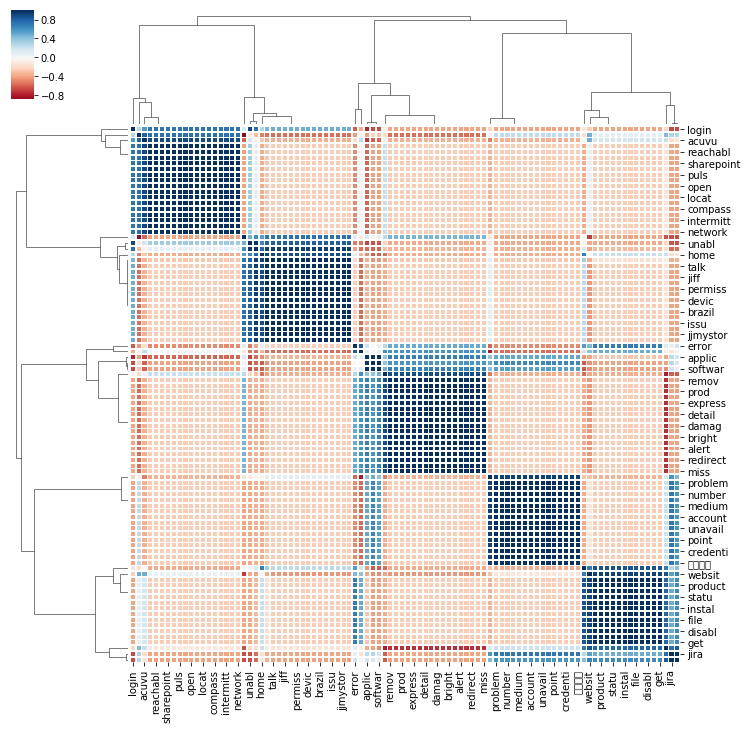

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [122]:
MAX_LENGTH = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.Description.values)
post_seq = tokenizer.texts_to_sequences(data.Description.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.05,random_state=42)

In [124]:
vocab_size = len(tokenizer.word_index) + 1

## Deep Learning Model Simple

In [125]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=10, callbacks=[checkpointer])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 500, 128)          988544    
_________________________________________________________________
flatten_1 (Flatten)          (None, 64000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2048032   
_________________________________________________________________
dense_2 (Dense)              (None, 15)                495       
Total params: 3,037,071
Trainable params: 3,037,071
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 627

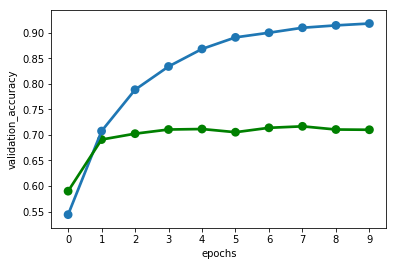

In [126]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [127]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

0.7210884353741497

In [131]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

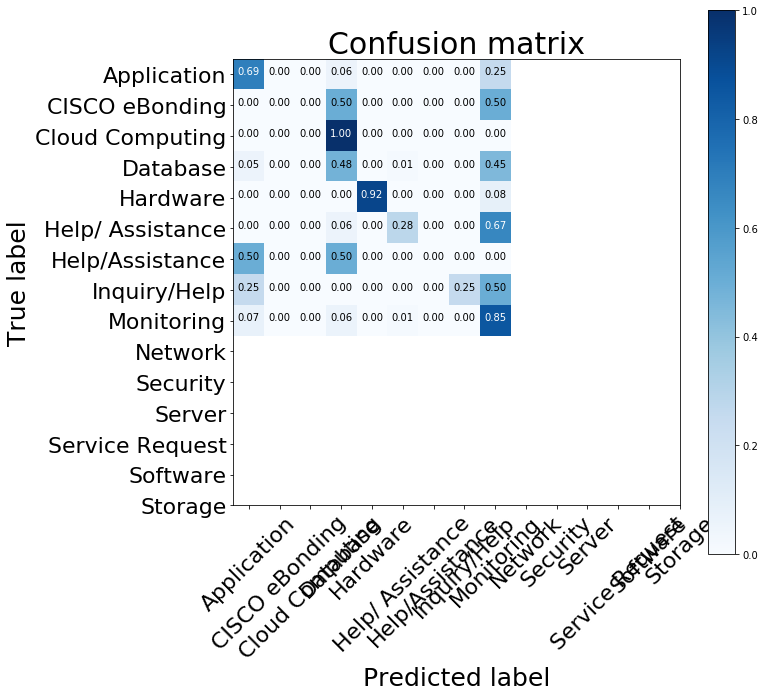

In [135]:
cnf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

## RNN

In [136]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)

x = LSTM(64)(embedding_layer)
x = Dense(32, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model_lstm = Model(inputs=[inputs], outputs=predictions)
model_lstm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 500)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 500, 128)          988544    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 15)                495       
Total params: 1,040,527
Trainable params: 1,040,527
Non-trainable params: 0
_________________________________________________________________


In [137]:
filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model_lstm.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=20, callbacks=[checkpointer])

Train on 6270 samples, validate on 2090 samples
Epoch 1/20
6270/6270 [==============================] - 34s 6ms/step - loss: 1.5744 - acc: 0.5437 - val_loss: 1.0703 - val_acc: 0.6211

Epoch 00001: val_acc improved from -inf to 0.62105, saving model to weights.hdf5
Epoch 2/20
6270/6270 [==============================] - 38s 6ms/step - loss: 0.8635 - acc: 0.7136 - val_loss: 0.8937 - val_acc: 0.7014

Epoch 00002: val_acc improved from 0.62105 to 0.70144, saving model to weights.hdf5
Epoch 3/20
6270/6270 [==============================] - 36s 6ms/step - loss: 0.6413 - acc: 0.7987 - val_loss: 0.8998 - val_acc: 0.7105

Epoch 00003: val_acc improved from 0.70144 to 0.71053, saving model to weights.hdf5
Epoch 4/20
6270/6270 [==============================] - 36s 6ms/step - loss: 0.5223 - acc: 0.8375 - val_loss: 0.9715 - val_acc: 0.7167

Epoch 00004: val_acc improved from 0.71053 to 0.71675, saving model to weights.hdf5
Epoch 5/20
6270/6270 [==============================] - 36s 6ms/step - loss

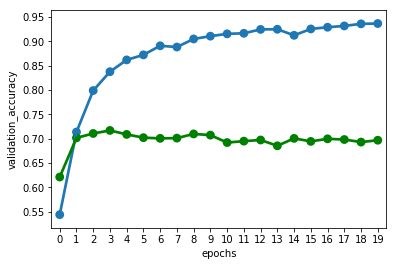

In [138]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [139]:
model_lstm.load_weights('weights.hdf5')
predicted = model_lstm.predict(X_test)


In [140]:
predicted

array([[1.95715670e-03, 2.96750604e-05, 5.51545643e-04, ...,
        1.07154949e-03, 8.30326557e-01, 3.45559638e-05],
       [8.85009859e-03, 1.99752012e-05, 8.32401711e-05, ...,
        4.57200361e-03, 9.67699349e-01, 1.11538604e-04],
       [5.11426926e-01, 2.47648801e-03, 3.68244038e-03, ...,
        3.72227244e-02, 7.15392977e-02, 1.06457330e-03],
       ...,
       [9.91776228e-01, 1.17003197e-04, 1.92948592e-05, ...,
        2.37861648e-03, 2.82122783e-04, 4.35422226e-05],
       [1.01945279e-02, 3.59659134e-05, 1.71294058e-04, ...,
        4.02343413e-03, 9.39866364e-01, 9.76770461e-05],
       [1.43111392e-03, 5.83151223e-06, 4.94418018e-05, ...,
        9.55944473e-04, 9.83384013e-01, 2.84913640e-05]], dtype=float32)

In [141]:
predicted = np.argmax(predicted, axis=1)

In [142]:
accuracy_score(y_test, predicted)

0.7165532879818595

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69        88
           2       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.69      0.42      0.53        73
           8       1.00      0.92      0.96        12
           9       0.50      0.33      0.40        18
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          13       0.74      0.85      0.79       241

   micro avg       0.72      0.72      0.72       441
   macro avg       0.40      0.36      0.37       441
weighted avg       0.70      0.72      0.70       441



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import itertools

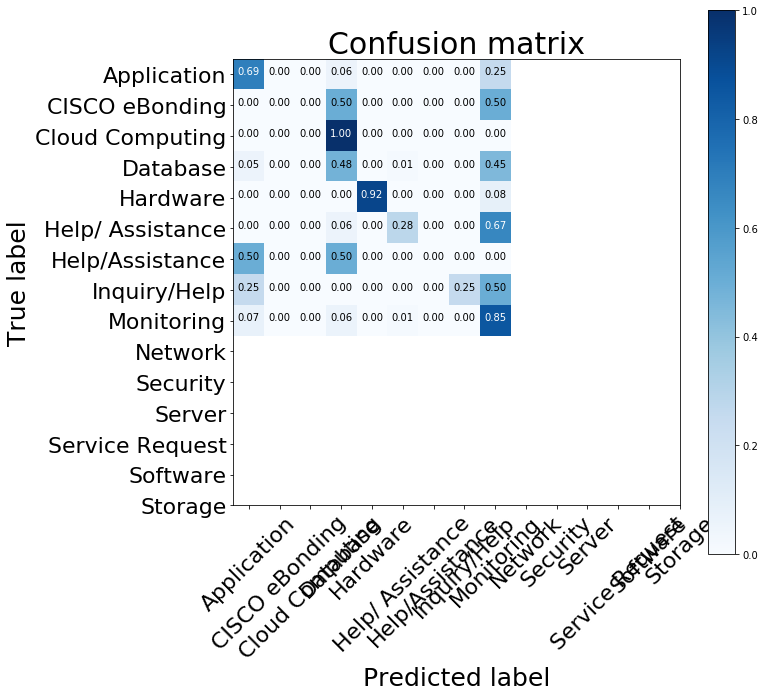

In [134]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(data.Category.values)
text_labels = encoder.classes_ 
cnf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [145]:
from sklearn.externals import joblib

In [146]:
joblib.dump(model_lstm,'model.pkl')

['model.pkl']

In [147]:
train_text, test_text, train_y, test_y = train_test_split(df['reviews.text'],df['target'],test_size = 0.5)

KeyError: 'reviews.text'

In [ ]:
MAX_NB_WORDS = 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


In [ ]:
sequences[0]

In [ ]:
type(tokenizer.word_index), len(tokenizer.word_index)

In [ ]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

In [ ]:
" ".join([index_to_word[i] for i in sequences[0]])

In [ ]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(seq_lens, bins=50);

In [ ]:
plt.hist([l for l in seq_lens if l < 200], bins=50);

In [ ]:
MAX_SEQUENCE_LENGTH = 150

# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

In [ ]:
y_train = train_y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
print('Shape of label tensor:', y_train.shape)
print('Shape of label tensor:', y_test.shape)
print('Shape of label tensor:', x_test.shape)


In [ ]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [ ]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model

EMBEDDING_DIM = 50
N_CLASSES = 6

# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
embedded_sequences = embedding_layer(sequence_input)

average = GlobalAveragePooling1D()(embedded_sequences)
predictions = Dense(N_CLASSES, activation='softmax')(average)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_split=0.1,
          nb_epoch=10, batch_size=128)

In [ ]:
score = model.evaluate(x_test, y_test, 
                       batch_size=128, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
from sklearn.metrics import classification_report
target_names = ["0","1","2","3","4"]

In [ ]:
output_test = model.predict(x_test)
print(output_test)